<a href="https://colab.research.google.com/github/JunHyeong-data/ML-DL-Study/blob/main/Basic-Deep-Learning/04_%EB%94%A5%EB%9F%AC%EB%8B%9D%2C_batch_learning%2C_%EB%B0%B0%EC%B9%98_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent & Mini-Batch Learning

## 1. 이전 내용 요약

이전 시간까지 우리는 주어진 데이터에 대해

[ y = ax ]

형태의 직선을 **loss 함수**와 **gradient descent / backpropagation**을 통해 학습하였다.
설명을 단순화하기 위해 데이터는 단 7개만 사용하였다.

하지만 실제 딥러닝에서는 상황이 전혀 다르다.

* 이미지 데이터셋: 수백만 장 이상
* 트래픽 데이터, 금융 데이터: 수억~조 단위

이렇게 **매우 큰 데이터셋을 한 번에 학습**시키는 것은

* 계산량이 너무 크고
* 메모리에 올리는 것 자체가 불가능

하다.

이 문제를 해결하기 위해 사용하는 방법이 바로 **Batch Learning**이다.
정확히 말하면 **Mini-Batch 기반 Stochastic Gradient Descent (SGD)** 이다.

---

## 2. 데이터셋 구성

이번 예제에서는 **5만 개의 데이터 포인트**가 들어 있는 데이터셋을 사용한다.

* 각 데이터는 (x, y) 쌍으로 구성
* 목표: 이 데이터를 가장 잘 설명하는 직선을 찾는 것

이번에는 모델을 다음과 같이 정의한다.

[ y = ax + b ]

즉, **두 개의 파라미터 (a, b)** 를 동시에 학습한다.

---

## 3. Training / Validation Set 분리

전체 데이터셋을 두 부분으로 나눈다.

* **Training Set**: 모델 학습용
* **Validation Set**: 학습되지 않은 데이터로 성능 검증

이렇게 나누는 이유는 모델이

* 학습 데이터에만 잘 맞고
* 새로운 데이터에는 못 맞는

**Overfitting** 상태인지 확인하기 위함이다.

이번 예제에서는 단순화를 위해 다음과 같이 분리한다.

* Training : Validation = **9 : 1**
* Training 데이터: 45,000개
* Validation 데이터: 5,000개

---

## 4. Stochastic Gradient Descent (SGD)

엄밀하게 말하면 SGD는 다음 과정을 반복한다.

1. Training set에서 **랜덤하게 하나의 데이터**를 선택
2. 해당 데이터로 loss 계산
3. Backpropagation으로 gradient 계산
4. 파라미터 업데이트

하지만 데이터가 수만~수백만 개일 경우,
이 방식을 그대로 사용하면 너무 비효율적이다.

---

## 5. Mini-Batch Learning

그래서 등장한 개념이 **Mini-Batch**이다.

* 한 번에 **여러 개의 데이터**를 묶어서 학습
* 예: batch size = 16, 32, 128

이 방식의 장점은 다음과 같다.

* 랜덤성 유지
* 계산 효율 증가
* GPU/메모리 사용 효율 증가

딥러닝에서는 이 방식이 너무 일반적이어서
보통 그냥 **SGD**라고 부른다.

---

## 6. Random Sampling Batch 생성

Mini-batch는 다음 방식으로 생성한다.

* 0부터 데이터 길이까지의 범위에서
* `batch size` 만큼의 **랜덤 인덱스** 생성
* 해당 인덱스로 x, y 데이터를 선택

이를 함수로 만들면 매 반복마다

* `batch_x`
* `batch_y`

를 얻을 수 있다.

실험 결과를 항상 동일하게 만들기 위해
**Random Seed**를 고정한다.

---

## 7. 학습 과정

초기값 설정:

* a = 3
* b = 0
* learning rate = 0.001
* 반복 횟수 = 5000

각 iteration에서 수행하는 과정은 다음과 같다.

1. Training set에서 mini-batch 샘플링

2. Prediction 계산

   [ \hat{y} = ax + b ]

3. Loss 계산 (MSE)

   [ loss = mean((\hat{y} - y)^2) ]

4. Backpropagation (`loss.backward()`)

5. a, b 업데이트

6. Gradient 초기화

동시에 **Validation loss**를 계산하여
모델이 일반화되고 있는지 확인한다.

---

## 8. 학습 결과

학습을 진행하면

* Validation loss가 약 98에서 시작하여
* 점진적으로 감소
* 최종적으로 a ≈ 1.48, b ≈ 3.02에 수렴

해당 파라미터로 직선을 그려보면
데이터를 잘 fitting하는 직선을 얻을 수 있다.

---

## 9. Batch Learning의 추가적인 장점

Mini-batch 기반 학습은 단순히 효율만 좋은 것이 아니다.

추가적인 효과:

* **Local Minimum**에 빠질 확률 감소
* 일정 수준의 **Regularization 효과**
* Overfitting 완화

이 개념들은 이후 더 깊이 다룬다.

---

## 10. Epoch(Epoch) 개념

랜덤 샘플링 방식에는 한 가지 문제가 있다.

* 같은 데이터가

  * 같은 배치 안에 여러 번 들어갈 수 있고
  * 서로 다른 배치에 반복해서 등장할 수 있음

이를 해결하기 위해 실제 딥러닝에서는

* 데이터를 한 번 섞은 뒤
* **모든 데이터를 정확히 한 번씩만 사용하는 방식**을 사용

이때 사용하는 개념이 **Epoch**이다.

* 1 Epoch = 전체 데이터셋을 한 번 모두 사용
* 내부에서는 랜덤한 순서

이번 강의에서는 개념 단순화를 위해 Epoch를 생략하였다.

---

## 11. 마무리

이번 시간에는

* Stochastic Gradient Descent
* Mini-Batch Learning
* Random Sampling 기반 학습

에 대해 알아보았다.

딥러닝에서는 **배치 학습이 표준**이므로
반드시 이해해야 하는 개념이다.

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git

Cloning into 'deepLearning'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 318 (delta 80), reused 134 (delta 55), pack-reused 139 (from 1)
Receiving objects: 100% (318/318), 17.60 MiB | 24.25 MiB/s, done.
Resolving deltas: 100% (116/116), done.


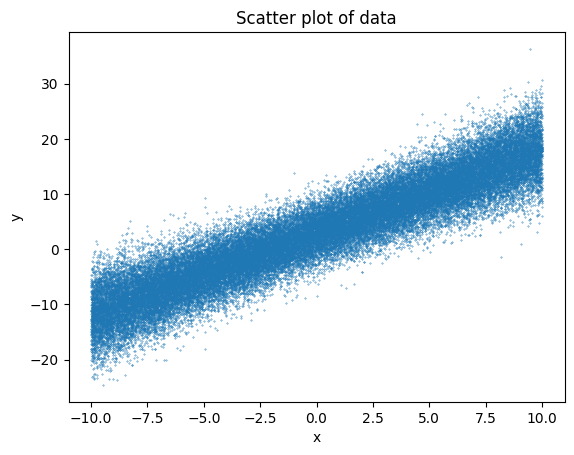

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv('./deepLearning/nn/points50k.csv')

x = data['x']
y = data['y']

plt.scatter(x=x,y=y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [4]:
import torch

x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

data_length = len(x_tensor)
split_n = int(data_length * 0.9)
train_x = x_tensor[:split_n]
train_y = y_tensor[:split_n]
val_x = x_tensor[split_n:]
val_y = y_tensor[split_n:]

g = torch.Generator().manual_seed(42)

def get_batch(x, y, batch_size=16):
  data_length = len(x)
  indices = torch.randint(0, data_length, (batch_size,), generator=g)
  return x[indices], y[indices]

batch_x, batch_y = get_batch(train_x, train_y)
print(batch_x)
"""
데이터 변환: 리스트 형태의 데이터를 파이토치 연산이 가능한 float32 타입의 텐서로 바꿉니다.

데이터 분할 (9:1): 전체 데이터의 90%는 **학습용(Train)**으로, 나머지 10%는 모델이 잘 만들어졌는지 확인할 **검증용(Validation)**으로 나눕니다.

랜덤 샘플링: 5만 개의 데이터를 한꺼번에 학습하면 무거우니까, 딱 16개(Batch Size)만 랜덤하게 뽑아주는 함수(get_batch)를 만듭니다.

결과 재현: manual_seed(42)를 설정해 코드를 다시 실행해도 항상 같은 랜덤 데이터가 나오도록 고정했습니다.
"""

tensor([-5.9500, -7.4400, -1.3300, -8.0500,  1.0200,  4.1000,  7.8400, -7.0100,
         3.6800, -0.3800,  2.9600,  4.2000,  9.8900,  6.7800,  5.0200, -9.3800])


In [8]:
for step in range(5000):
    batch_x, batch_y = get_batch(train_x, train_y)

    # 1. Training Loss 계산
    pred = a_tensor * batch_x + b_tensor
    loss = torch.mean((pred - batch_y) ** 2)

    # 2. Validation Loss 계산 (메모리 절약을 위해 no_grad 사용)
    with torch.no_grad():
        val_pred = a_tensor * val_x + b_tensor
        val_loss = torch.mean((val_pred - val_y) ** 2)

    # 3. 출력 (val_loss도 .item()으로 출력)
    if step % 500 == 0: # 매번 출력하면 느리니까 500번마다 출력 추천
        print(f'step: {step}, val loss: {val_loss.item():.4f}, train loss: {loss.item():.4f}')

    # 4. 역전파 및 업데이트
    loss.backward()
    with torch.no_grad():
        a_tensor -= 0.001 * a_tensor.grad
        b_tensor -= 0.001 * b_tensor.grad
        a_tensor.grad.zero_()
        b_tensor.grad.zero_()
"""
Gemini said
요약
제공하신 코드는 경사하강법(Gradient Descent)을 이용해 선형 회귀 모델을 학습시키는 과정입니다. 매 스텝마다 데이터를 불러와 예측값과 실제값의 차이(Loss)를 계산하고, 그 오차를 줄이는 방향으로 파라미터(a,b)를 업데이트합니다.

코드 상세 설명
1. 학습 루프 및 데이터 배치
for step in range(5000):을 통해 전체 과정을 5,000번 반복합니다. get_batch 함수는 전체 학습 데이터 중 일부(Batch)를 무작위로 추출하여 학습 효율을 높입니다.

2. 손실 함수(Loss Function) 계산
Training Loss: pred=ax+b 형태의 선형 회귀 식을 사용하여 예측값을 구하고, 실제값과의 평균 제곱 오차(MSE)를 계산합니다.

Validation Loss: 모델이 학습되지 않은 데이터(Validation set)에 대해 얼마나 잘 작동하는지 평가합니다. torch.no_grad()를 사용하여 기울기 계산을 생략함으로써 메모리를 아끼고 속도를 높입니다.

3. 역전파 및 파라미터 업데이트
이 부분이 모델이 '학습'하는 핵심 단계입니다.

loss.backward(): 손실값에 대한 각 파라미터의 기울기(Gradient)를 계산합니다.

기울기 반영: a_tensor -= 0.001 * a_tensor.grad와 같이 학습률(0.001)을 곱해 파라미터를 업데이트합니다.

grad.zero_(): 파이토치는 기울기를 누적하는 성질이 있으므로, 다음 계산을 위해 사용한 기울기를 0으로 초기화합니다.
"""

step: 0, val loss: 14.0498, train loss: 12.0010
step: 500, val loss: 11.9935, train loss: 17.2104
step: 1000, val loss: 11.9588, train loss: 18.6776
step: 1500, val loss: 11.9606, train loss: 8.6201
step: 2000, val loss: 11.9733, train loss: 9.8741
step: 2500, val loss: 12.0692, train loss: 9.6498
step: 3000, val loss: 11.9461, train loss: 10.9220
step: 3500, val loss: 11.9612, train loss: 7.4481
step: 4000, val loss: 11.9658, train loss: 17.6111
step: 4500, val loss: 11.9629, train loss: 17.0111


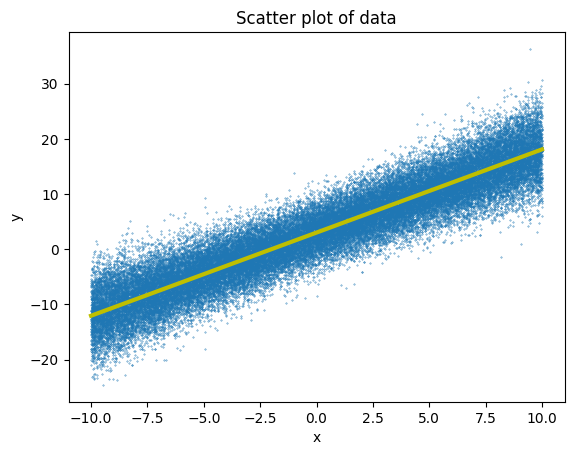

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x=x, y=y, s=0.1)

a = a_tensor.item()
b = b_tensor.item()

x_line = np.linspace(-10, 10, 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, color='y', lw=3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()
"""
